<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [66]:
import pandas as pd

Load the dataset into a dataframe.


In [67]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

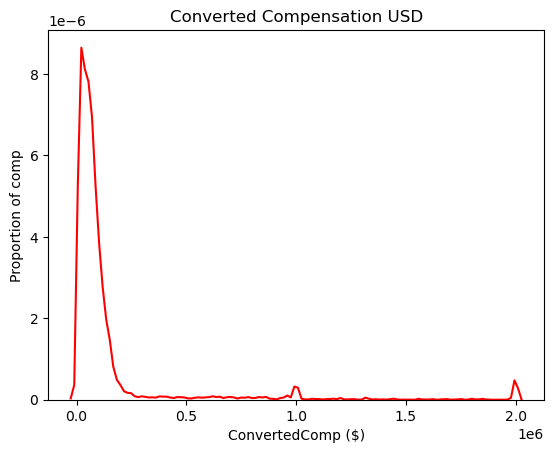

In [69]:
# your code goes here

sns.distplot(df['ConvertedComp'], hist=False, color="r")

plt.title('Converted Compensation USD')
plt.xlabel('ConvertedComp ($)')
plt.ylabel('Proportion of comp')
plt.show()

Plot the histogram for the column `ConvertedComp`.


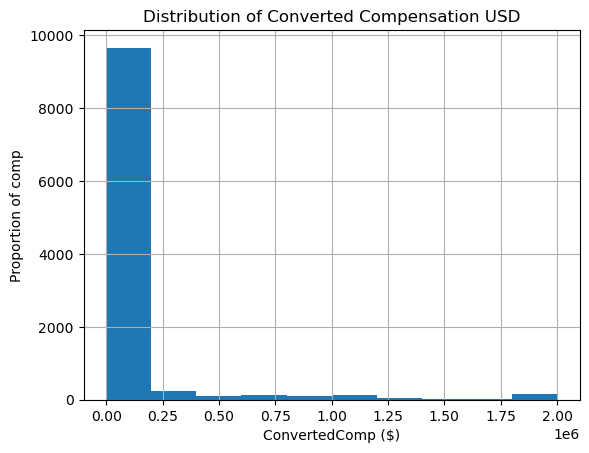

In [70]:
# your code goes here

df['ConvertedComp'].hist()
# add labels and title
plt.title('Distribution of Converted Compensation USD')
plt.xlabel('ConvertedComp ($)')
plt.ylabel('Proportion of comp')
plt.show()


What is the median of the column `ConvertedComp`?


In [71]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [72]:
# ***  counts frequency of all unique values *****    
#df2 = df['Gender'].value_counts()
#print("Count the frequency of unique values:\n", df2)

# ***  counts occurences of 'Man' in Gender column *****
(df['Gender']=='Man').sum()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [73]:
# your code goes here
# selecting rows based on condition
df2 = df.loc[df['Gender']=='Woman']
df2['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [74]:
# your code goes here

age = df['Age']
print("Five number summary: ") 
print(age.describe().loc[['min', '25%', '50%', '75%', 'max']])
print("*************************************") 
print("median respondent age: ") 
print(df['Age'].median())


Five number summary: 
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64
*************************************
median respondent age: 
29.0


Plot a histogram of the column `Age`.


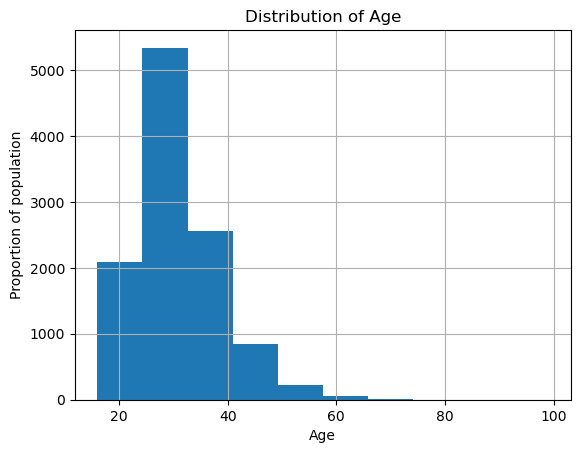

In [75]:
# your code goes here
df['Age'].hist()
# add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Proportion of population')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

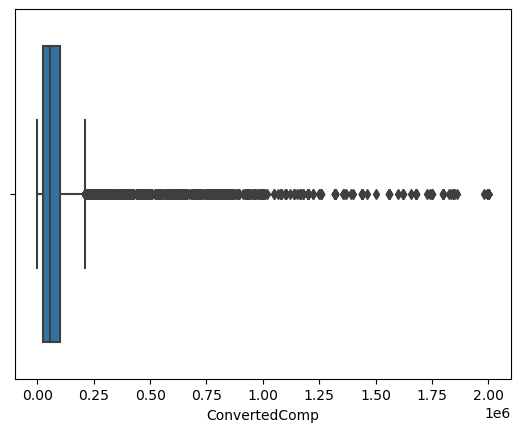

In [76]:
# your code goes here
sns.boxplot(df['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [77]:
import numpy as np

# Calculate IQR
Q1 = df['ConvertedComp'].quantile(0.25)
Q2 = df['ConvertedComp'].quantile(0.5)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print("Q1: ", Q1)
print("Q2: ", Q2)
print("Q3: ", Q3)
print("IQR: ", IQR)


Q1:  26868.0
Q2:  57745.0
Q3:  100000.0
IQR:  73132.0


Find out the upper and lower bounds.


In [78]:
# calculate min/max
data_min, data_max = df['ConvertedComp'].min(), df['ConvertedComp'].max()
print('Min: %.3f' % data_min)
print('Max: %.3f' % data_max)

Min: 0.000
Max: 2000000.000


Identify how many outliers are there in the `ConvertedComp` column.


In [79]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df['ConvertedComp'] >= upper)
print("Upper Bound:", upper)
print("# of datapoints after Upper Bound:", upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df['ConvertedComp'] <= lower)
print("Lower Bound:", lower)
print("# of datapoints before Lower Bound:", lower_array.sum())


Upper Bound: 209698.0
# of datapoints after Upper Bound: 879
Lower Bound: -82830.0
# of datapoints before Lower Bound: 0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [80]:
# your code goes here
print("Old dataframe shape for ConvertedComp (with outliers): ", df['ConvertedComp'].shape)

outlier_df = df.loc[df['ConvertedComp']>upper]
print("Outliers dataframe shape for ConvertedComp: ", outlier_df['ConvertedComp'].shape)

outlier_free_df = df.loc[df['ConvertedComp']<=upper]
print("New dataframe shape for ConvertedComp (no outliers): ", outlier_free_df['ConvertedComp'].shape)

print("ConvertedComp median after removing outliers:", outlier_free_df['ConvertedComp'].median())
print("ConvertedComp mean after removing outliers:", outlier_free_df['ConvertedComp'].mean())


Old dataframe shape for ConvertedComp (with outliers):  (11398,)
Outliers dataframe shape for ConvertedComp:  (879,)
New dataframe shape for ConvertedComp (no outliers):  (9703,)
ConvertedComp median after removing outliers: 52704.0
ConvertedComp mean after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [63]:
from scipy import stats

In [65]:
# identify numerical cols
df.select_dtypes(include=np.number)

# fill NaN rows
df['CompTotal'].fillna(value=df['CompTotal'].mean(), inplace=True)
df['WorkWeekHrs'].fillna(value=df['WorkWeekHrs'].mean(), inplace=True)
df['CodeRevHrs'].fillna(value=df['CodeRevHrs'].mean(), inplace=True)
df['ConvertedComp'].fillna(value=df['ConvertedComp'].mean(), inplace=True)
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# verify there are no NaN rows
print(df['CompTotal'].isnull().sum())
print(df['ConvertedComp'].isnull().sum())
print(df['WorkWeekHrs'].isnull().sum())
print(df['CodeRevHrs'].isnull().sum())
print(df['Age'].isnull().sum())

for param in ['Respondent','CompTotal','ConvertedComp','WorkWeekHrs','CodeRevHrs']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Age'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

0
0
0
0
0
Respondent
The Pearson Correlation Coefficient for  Respondent  is 0.003991470083269778  with a P-value of P = 0.6700422955930638
CompTotal
The Pearson Correlation Coefficient for  CompTotal  is 0.006731518652847098  with a P-value of P = 0.47239001019506893
ConvertedComp
The Pearson Correlation Coefficient for  ConvertedComp  is 0.10029880488618266  with a P-value of P = 7.052107800424875e-27
WorkWeekHrs
The Pearson Correlation Coefficient for  WorkWeekHrs  is 0.0363111802779463  with a P-value of P = 0.00010554118788205917
CodeRevHrs
The Pearson Correlation Coefficient for  CodeRevHrs  is -0.01704215395419295  with a P-value of P = 0.06885392384752465


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
